In [30]:
%pip install yfinance pynance plotly 

import os
import sys
import talib
import pandas as pd
import yfinance as yf
import pynance as pn
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached pynance-1.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-py313-none-any.whl.metadata (23 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl.metadata (15 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Stock analysis ('AAPL)
Read the raw data


In [33]:
# Load the CSV file of AAPL_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\AAPL_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))


         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600
5  1980-12-19  0.126116  0.126674  0.126116  0.126116   48630400
6  1980-12-22  0.132254  0.132813  0.132254  0.132254   37363200
7  1980-12-23  0.137835  0.138393  0.137835  0.137835   46950400
8  1980-12-24  0.145089  0.145647  0.145089  0.145089   48003200
9  1980-12-26  0.158482  0.159040  0.158482  0.158482   55574400


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\822725920.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('../data/yfinance_data\AAPL_historical_data.csv')


                 Open       High        Low      Close     Volume      SMA20  \
Date                                                                           
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400  69.797249   
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800  70.243374   
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200  70.671124   
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000  71.017124   
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200  71.470499   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  70.360946  84.583737  2.177467     1.831564   0.345902  0.022816   
2020-01-03  70.741570  77.703695  2.228504     1.910952   0.317552 -0.009722   
2020-01-06  71.142373  79.183674  2.290359     1.986833   0.303526  0.007968   
2020-01-07  71.471433  75.953553  2.284

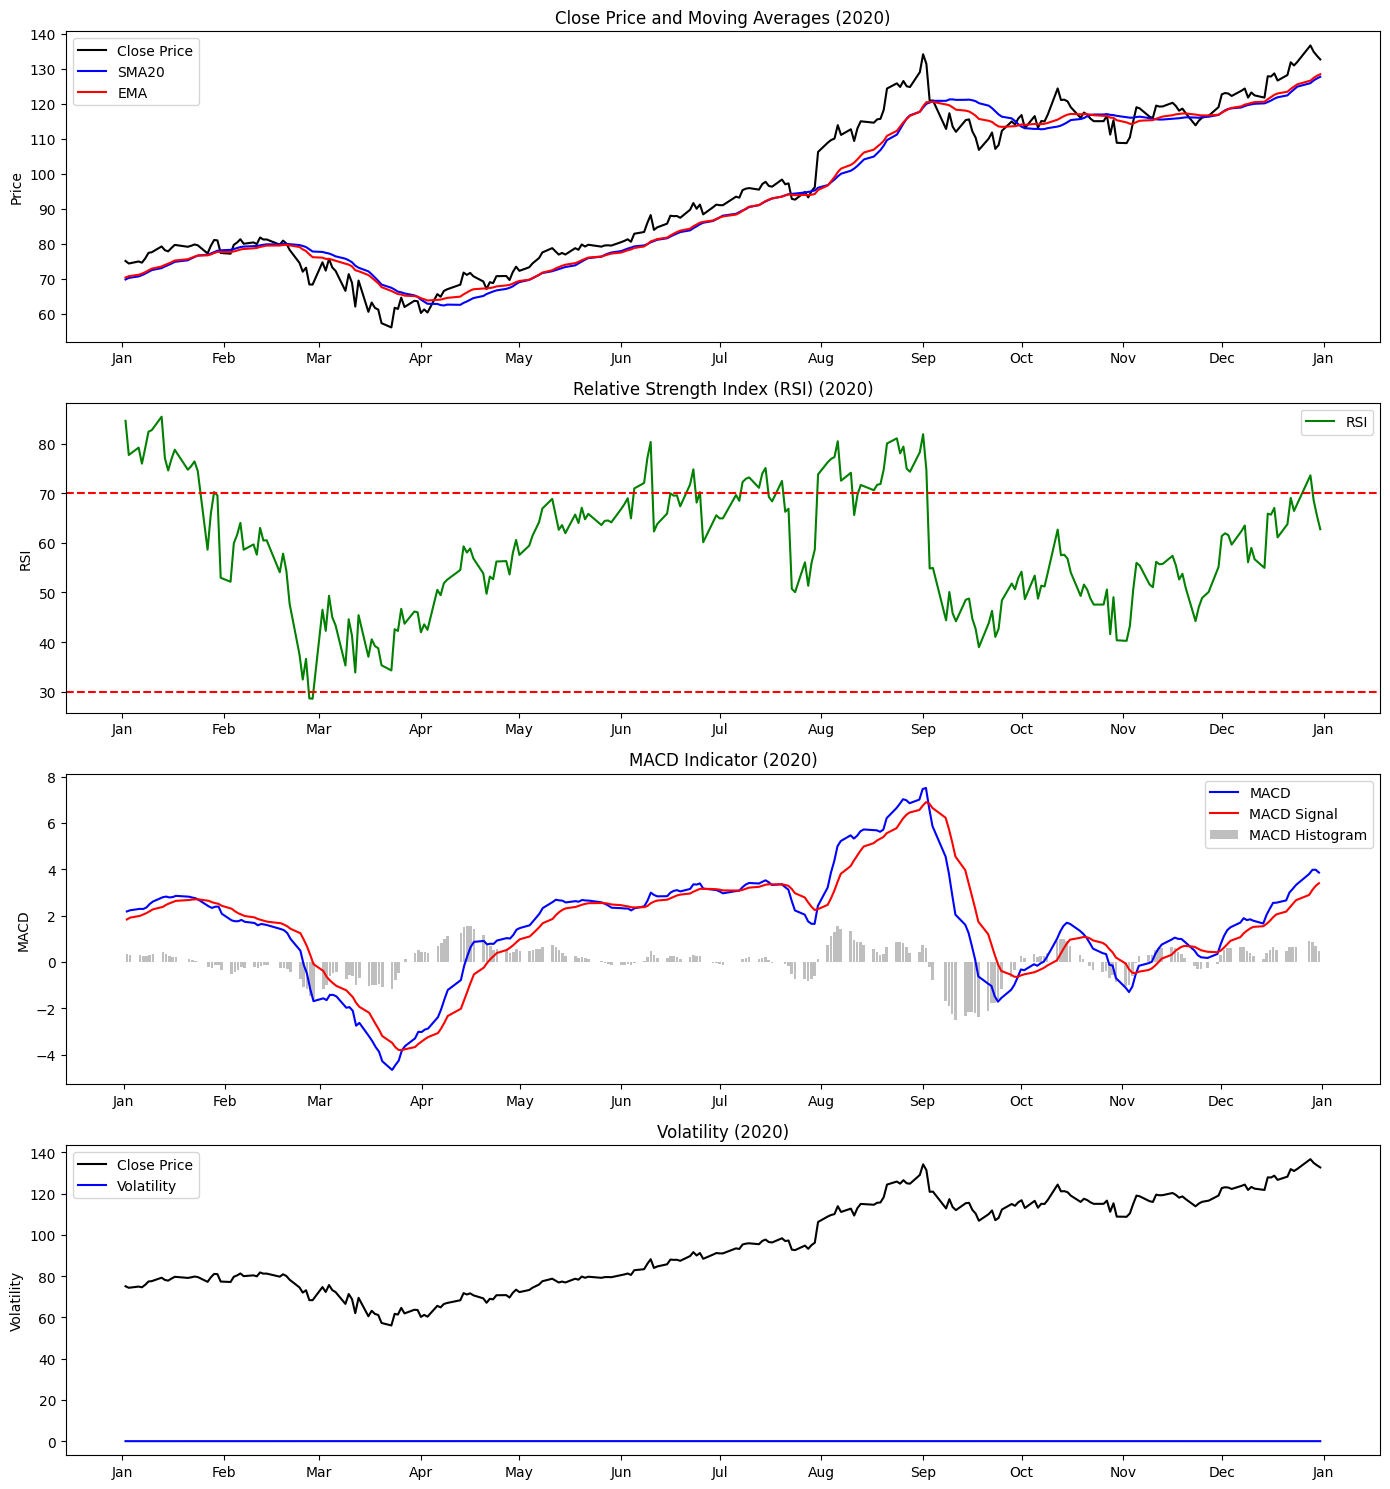

In [34]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock Analysis (AMZN)


In [37]:
# Load the CSV file of AMZN_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\AMZN_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))

         Date      Open      High       Low     Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000
5  1997-05-22  0.071875  0.072396  0.065625  0.069792   235536000
6  1997-05-23  0.070313  0.076042  0.066667  0.075000   318744000
7  1997-05-27  0.075521  0.082292  0.072917  0.079167   173952000
8  1997-05-28  0.081250  0.081771  0.076563  0.076563    91488000
9  1997-05-29  0.077083  0.077083  0.073958  0.075260    69456000


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\3961818536.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('../data/yfinance_data\AMZN_historical_data.csv')


                 Open       High        Low      Close    Volume      SMA20  \
Date                                                                          
2020-01-02  93.750000  94.900497  93.207497  94.900497  80580000  89.619200   
2020-01-03  93.224998  94.309998  93.224998  93.748497  75288000  89.904900   
2020-01-06  93.000000  95.184502  93.000000  95.143997  81236000  90.310899   
2020-01-07  95.224998  95.694504  94.601997  95.343002  80898000  90.699049   
2020-01-08  94.902000  95.550003  94.321999  94.598503  70160000  91.055199   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  90.551620  72.356713  1.306534     0.731564   0.574970  0.027151   
2020-01-03  90.856084  65.341868  1.392250     0.863701   0.528548 -0.012139   
2020-01-06  91.264457  69.233083  1.554861     1.001933   0.552928  0.014886   
2020-01-07  91.652890  69.754588  1.680419    

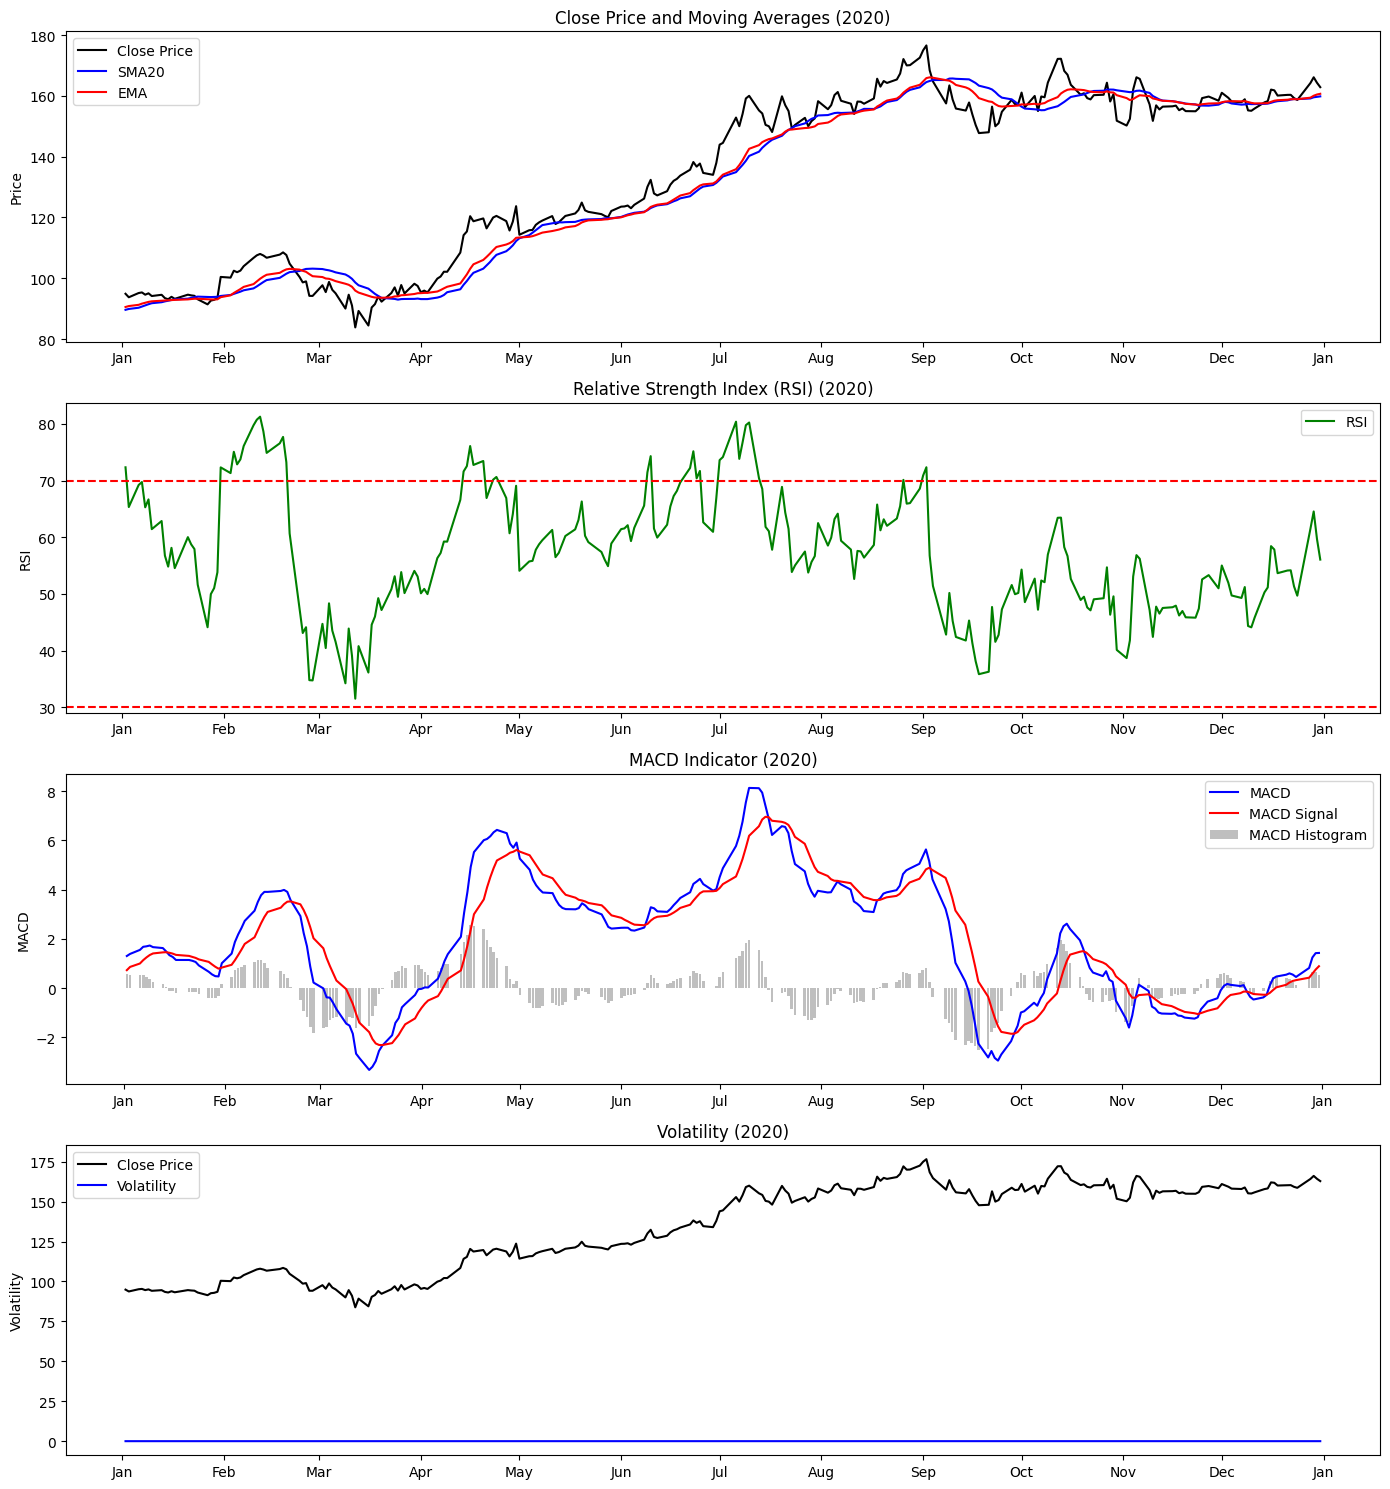

In [38]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock Analysis (GOOG)


In [40]:
# Load the CSV file of GOOG_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\GOOG_historical_data.csv')
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))

         Date      Open      High       Low     Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104  184645512
5  2004-08-26  2.613952  2.688672  2.606729  2.687676  142572401
6  2004-08-27  2.692408  2.705360  2.632383  2.643840  124826132
7  2004-08-30  2.622171  2.627402  2.540727  2.540727  104429967
8  2004-08-31  2.547950  2.583068  2.544463  2.549693   98825037
9  2004-09-01  2.557912  2.564637  2.482445  2.496891  183633734


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\919072153.py:2: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('../data/yfinance_data\GOOG_historical_data.csv')


                 Open       High        Low      Close    Volume      SMA20  \
Date                                                                          
2020-01-02  67.077499  68.406998  67.077499  68.368500  28132000  67.350975   
2020-01-03  67.392998  68.625000  67.277199  68.032997  23728000  67.451274   
2020-01-06  67.500000  69.824997  67.500000  69.710503  34646000  67.616475   
2020-01-07  69.897003  70.149498  69.518997  69.667000  30054000  67.748275   
2020-01-08  69.603996  70.579002  69.542000  70.216003  30560000  67.900175   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  67.113821  63.307875  0.577685     0.681137  -0.103453  0.022700   
2020-01-03  67.201362  59.919179  0.584163     0.661742  -0.077580 -0.004907   
2020-01-06  67.440327  68.886721  0.716399     0.672674   0.043725  0.024657   
2020-01-07  67.652391  68.458956  0.808368    

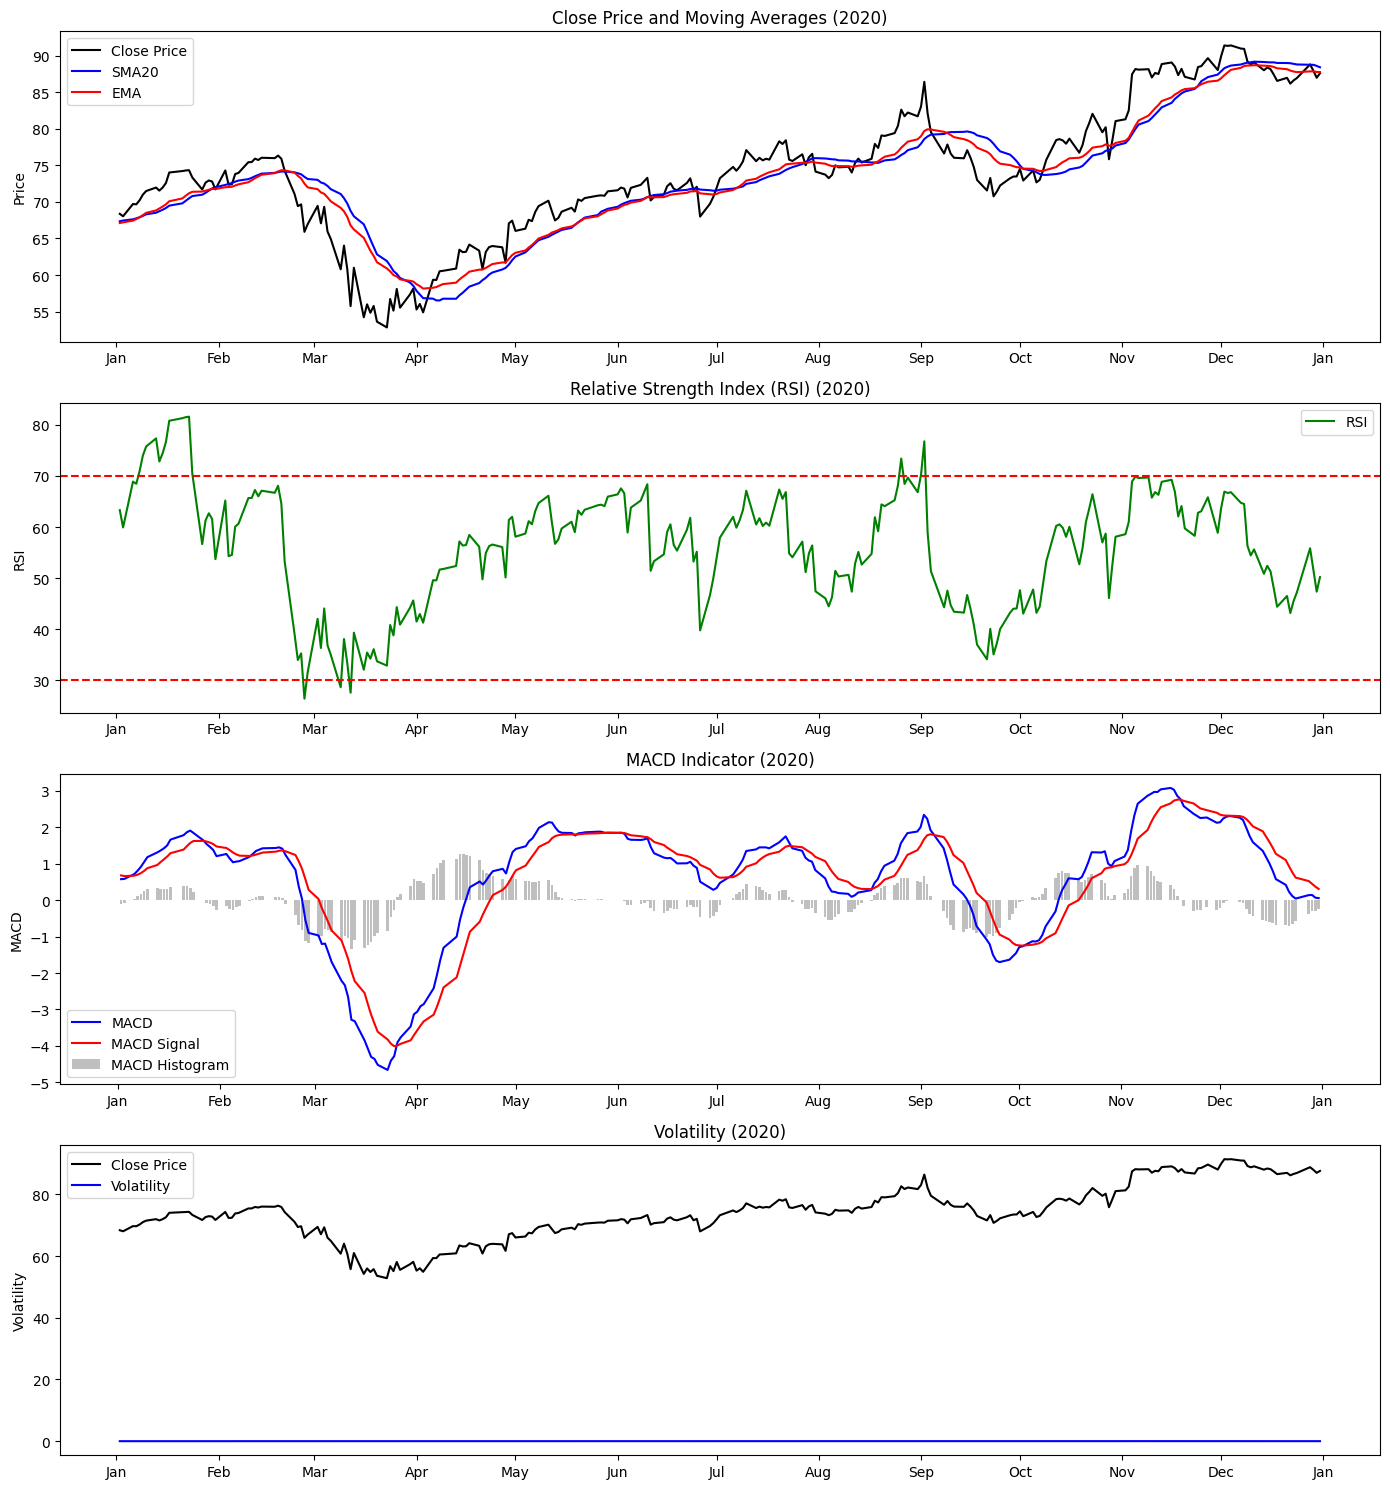

In [41]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock Analysis (META)


In [44]:
# Load the CSV file of META_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\META_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))

         Date       Open       High        Low      Close    Volume
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  46704200
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  81051600
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  91631600
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  57742500
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  60512900
5  2012-12-19  27.830000  28.219999  26.950001  27.410000  61390300
6  2012-12-20  27.490000  27.600000  27.129999  27.360001  35574800
7  2012-12-21  26.660000  27.010000  26.120001  26.260000  54555200
8  2012-12-24  26.500000  26.959999  26.200001  26.930000  28230100
9  2012-12-26  27.030001  27.180000  26.379999  26.510000  33175400


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\3251773003.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('../data/yfinance_data\META_historical_data.csv')


                  Open        High         Low       Close    Volume  \
Date                                                                   
2020-01-02  206.750000  209.789993  206.270004  209.779999  12077100   
2020-01-03  207.210007  210.399994  206.949997  208.669998  11188400   
2020-01-06  206.699997  212.779999  206.520004  212.600006  17058900   
2020-01-07  212.820007  214.580002  211.750000  213.059998  14912400   
2020-01-08  213.000000  216.240005  212.610001  215.220001  13475000   

                 SMA20         EMA        RSI      MACD  MACD_Signal  \
Date                                                                   
2020-01-02  202.612499  203.321175  65.421149  2.950053     2.649862   
2020-01-03  203.110499  203.830587  62.680632  3.017246     2.723339   
2020-01-06  203.772499  204.665770  67.820464  3.349010     2.848473   
2020-01-07  204.372999  205.465220  68.369576  3.607469     3.000272   
2020-01-08  205.066999  206.394247  70.882207  3.941162     3.1

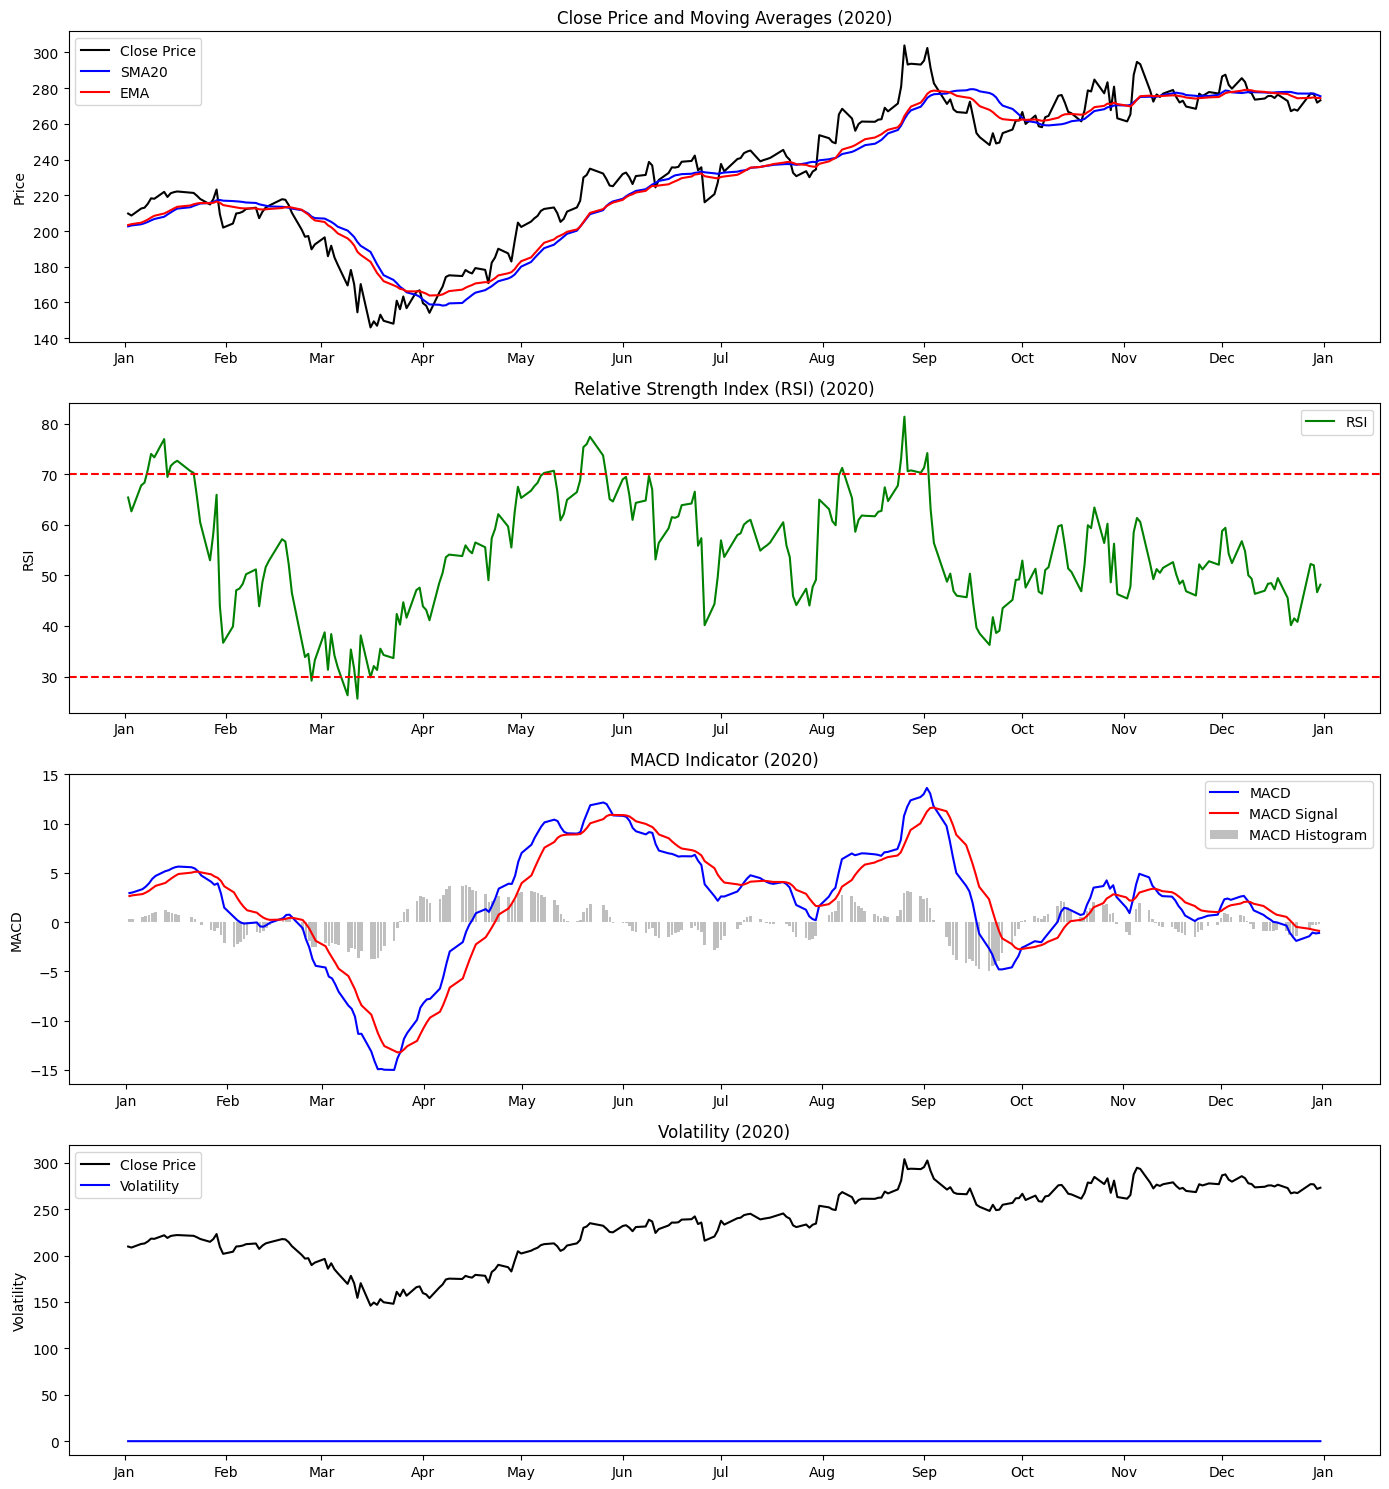

In [43]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock Analysis (MSFT)


In [45]:
# Load the CSV file of MSFT_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\MSFT_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))


         Date      Open      High       Low     Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090    47894400
5  1986-03-20  0.098090  0.098090  0.094618  0.095486    58435200
6  1986-03-21  0.095486  0.097222  0.091146  0.092882    59990400
7  1986-03-24  0.092882  0.092882  0.089410  0.090278    65289600
8  1986-03-25  0.090278  0.092014  0.089410  0.092014    32083200
9  1986-03-26  0.092014  0.095486  0.091146  0.094618    22752000


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\1621218352.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('../data/yfinance_data\MSFT_historical_data.csv')


                  Open        High         Low       Close    Volume  \
Date                                                                   
2020-01-02  158.779999  160.729996  158.330002  160.619995  22622100   
2020-01-03  158.320007  159.949997  158.059998  158.619995  21116200   
2020-01-06  157.080002  159.100006  156.509995  159.029999  20813700   
2020-01-07  159.320007  159.669998  157.320007  157.580002  21634100   
2020-01-08  158.929993  160.800003  157.949997  160.089996  27746500   

                 SMA20         EMA        RSI      MACD  MACD_Signal  \
Date                                                                   
2020-01-02  154.976501  155.494847  76.237642  2.734446     2.567812   
2020-01-03  155.415000  155.792480  65.516791  2.651697     2.584589   
2020-01-06  155.870000  156.100815  66.555113  2.589354     2.585542   
2020-01-07  156.161501  156.241690  59.707811  2.395331     2.547500   
2020-01-08  156.598000  156.608195  66.191903  2.416250     2.5

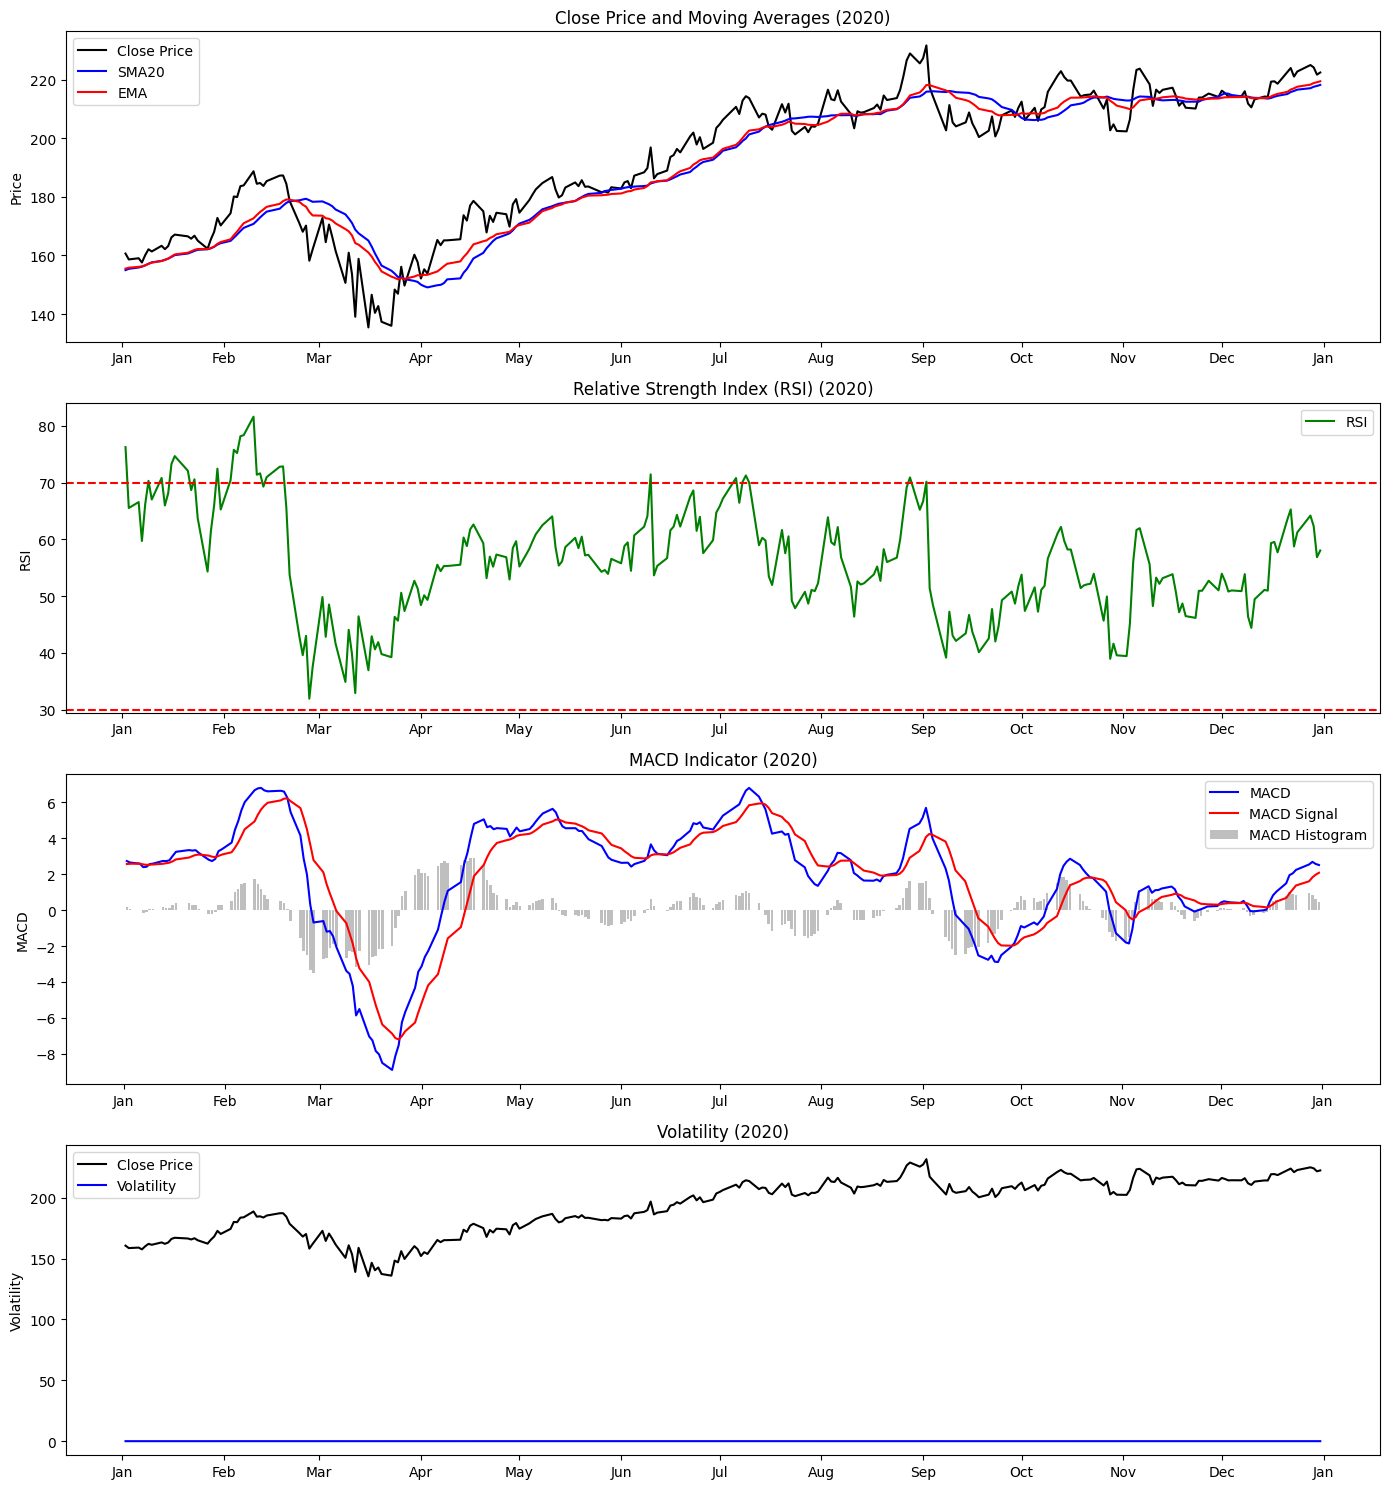

In [46]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock Analysis (NVDA)


In [ ]:
# Load the CSV file of NVDA_historical_data into a Pandas DataFrame
# Load the CSV file of AMZN_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))


         Date      Open      High       Low     Close      Volume
0  1999-01-22  0.043750  0.048828  0.038802  0.041016  2714688000
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   510480000
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   343200000
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   244368000
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   227520000
5  1999-01-29  0.041536  0.041667  0.039583  0.039583   244032000
6  1999-02-01  0.039583  0.040625  0.039583  0.040365   154704000
7  1999-02-02  0.039583  0.040625  0.036068  0.037240   264096000
8  1999-02-03  0.036719  0.038542  0.036458  0.038021    75120000
9  1999-02-04  0.038542  0.041146  0.038021  0.040104   181920000


               Open     High      Low    Close     Volume     SMA20       EMA  \
Date                                                                            
2020-01-02  5.96875  5.99775  5.91800  5.99775  237536000  5.675862  5.727043   
2020-01-03  5.87750  5.94575  5.85250  5.90175  205384000  5.709175  5.743682   
2020-01-06  5.80800  5.93175  5.78175  5.92650  262636000  5.744575  5.761093   
2020-01-07  5.95500  6.04425  5.90975  5.99825  314856000  5.779275  5.783679   
2020-01-08  5.99400  6.05100  5.95375  6.00950  277108000  5.814538  5.805186   

                  RSI      MACD  MACD_Signal  MACD_Hist    Return  Volatility  
Date                                                                           
2020-01-02  69.941889  0.184575     0.179626   0.004949  0.019592    0.012234  
2020-01-03  63.165915  0.176051     0.178911  -0.002860 -0.016006    0.012845  
2020-01-06  64.130727  0.169341     0.176997  -0.007656  0.004194    0.012841  
2020-01-07  66.842256  0.167877 

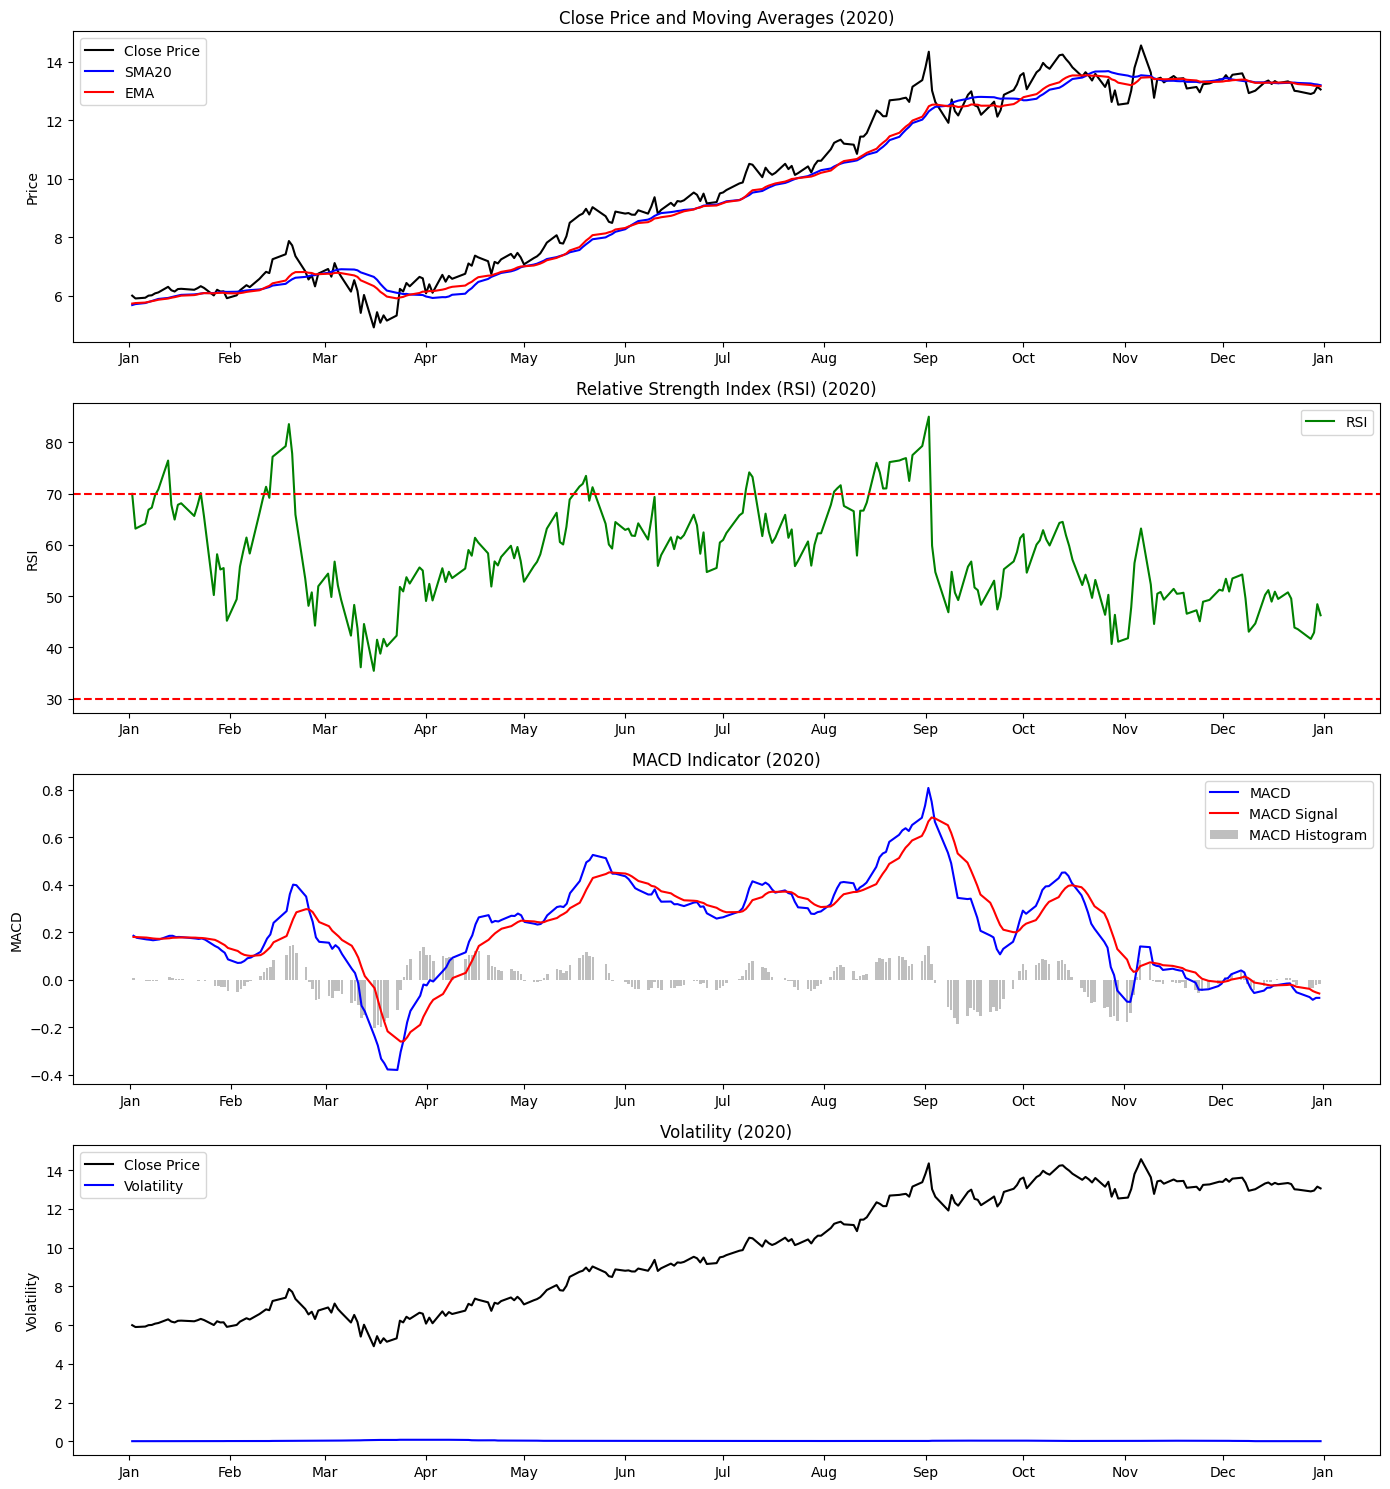

In [55]:
# The 'Date' column is already set as the index and is in datetime format, so we skip this step.

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

Stock analysis (TSLA)


In [56]:
# Load the CSV file of TSLA_historical_data into a Pandas DataFrame
df = pd.read_csv('../data/yfinance_data\TSLA_historical_data.csv')
# Ensure the required columns are present
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Display the first few rows of the data
print(df.head(10))


         Date      Open      High       Low     Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500
5  2010-07-07  1.093333  1.108667  0.998667  1.053333  103825500
6  2010-07-08  1.076000  1.168000  1.038000  1.164000  115671000
7  2010-07-09  1.172000  1.193333  1.103333  1.160000   60759000
8  2010-07-12  1.196667  1.204667  1.133333  1.136667   33037500
9  2010-07-13  1.159333  1.242667  1.126667  1.209333   40201500


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\getde\AppData\Local\Temp\ipykernel_39668\3714081098.py:2: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('../data/yfinance_data\TSLA_historical_data.csv')


                 Open       High        Low      Close     Volume      SMA20  \
Date                                                                           
2020-01-02  28.299999  28.713333  28.114000  28.684000  142981500  25.635933   
2020-01-03  29.366667  30.266666  29.128000  29.534000  266677500  26.002533   
2020-01-06  29.364668  30.104000  29.333332  30.102667  151995000  26.406433   
2020-01-07  30.760000  31.441999  30.224001  31.270666  268231500  26.850333   
2020-01-08  31.580000  33.232666  31.215334  32.809334  467164500  27.359033   

                  EMA        RSI      MACD  MACD_Signal  MACD_Hist    Return  \
Date                                                                           
2020-01-02  26.206907  75.726622  1.671410     1.506794   0.164616  0.028518   
2020-01-03  26.523773  78.627413  1.731141     1.551663   0.179478  0.029633   
2020-01-06  26.864620  80.321736  1.803574     1.602045   0.201529  0.019255   
2020-01-07  27.284244  83.257546  1.932

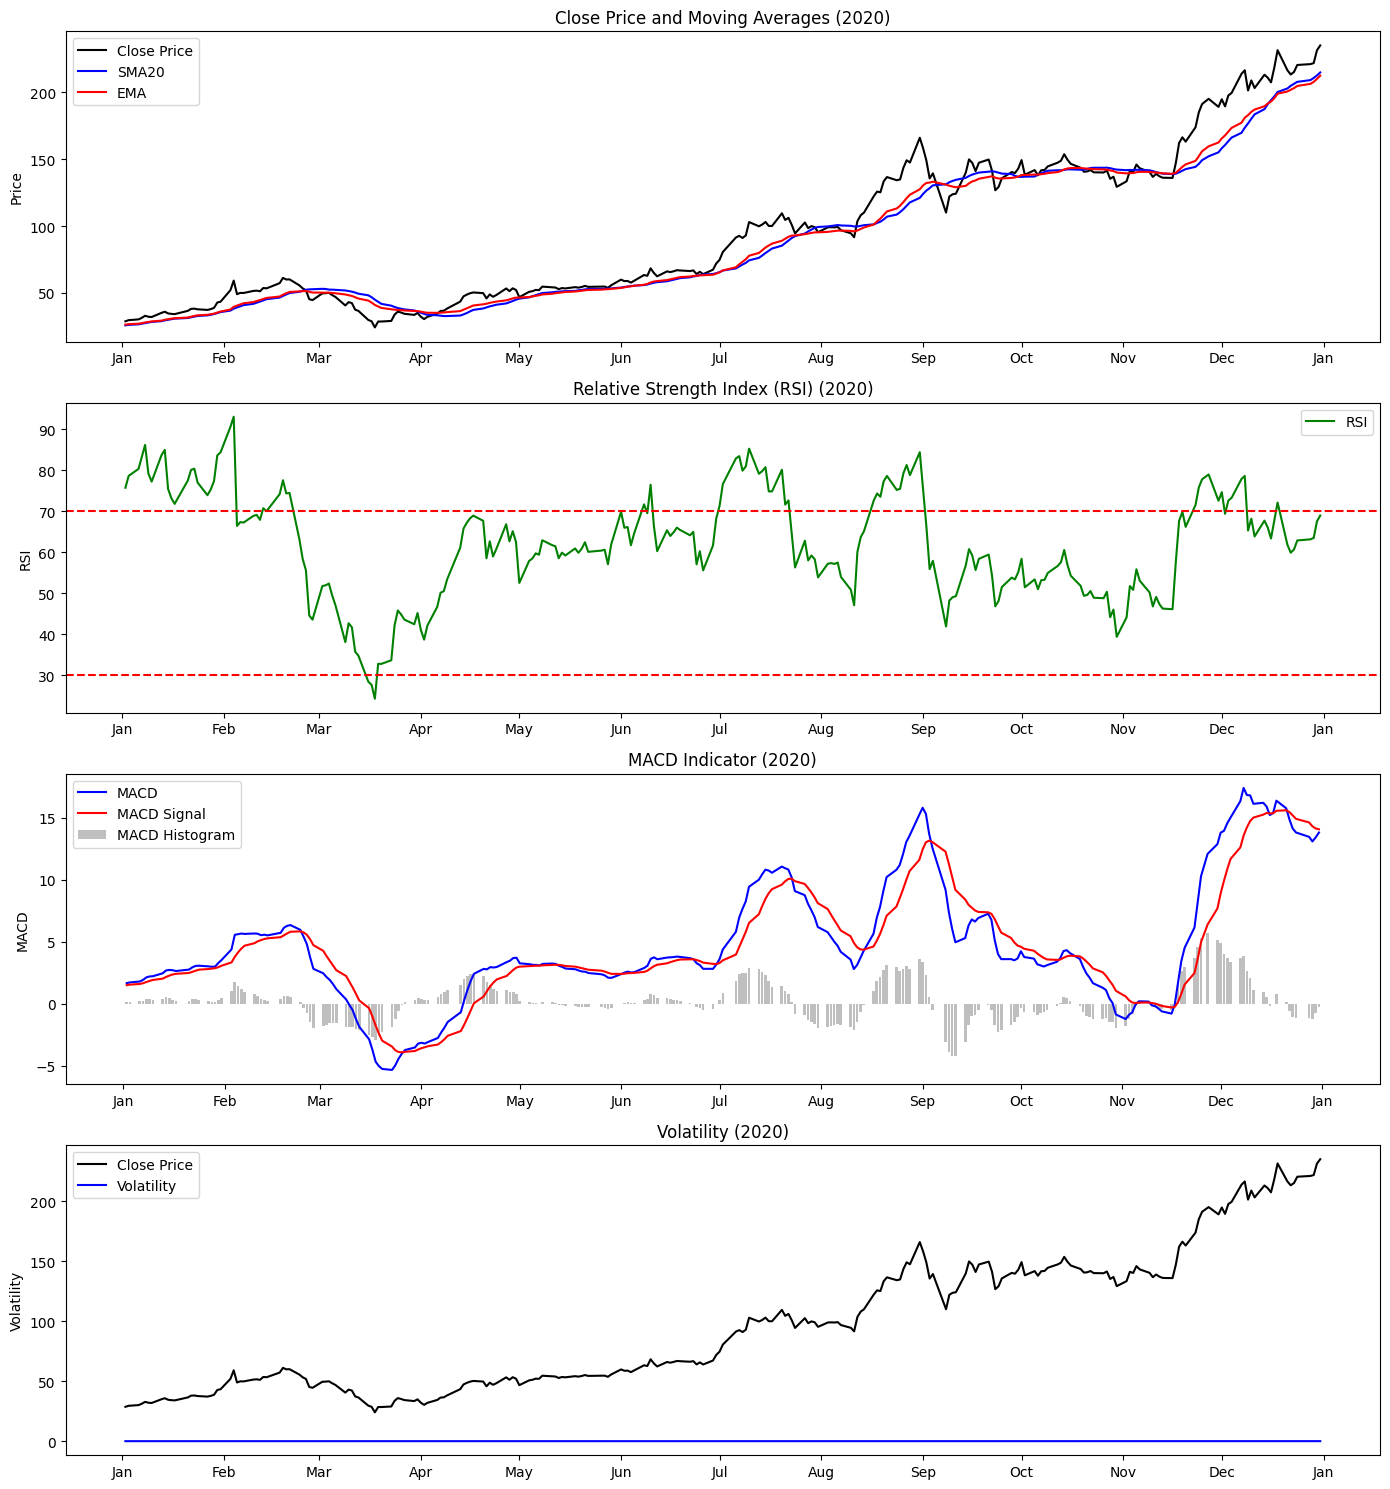

In [57]:
# Convert Date column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])  # Corrected: Ensure 'Date' column is in datetime format
df.set_index('Date', inplace=True)

# Calculate 20-day Simple Moving Average (SMA) and 20-day Exponential Moving Average (EMA)
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['EMA'] = talib.EMA(df['Close'], timeperiod=20)

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Calculate rolling volatility (21-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=21).std()

# Filter the DataFrame to include only data from 2020
df_2020 = df.loc['2020-01-01':'2020-12-31']  

# Display the filtered DataFrame with the new indicators
print(df_2020.head())

# Plotting
plt.figure(figsize=(14, 15))

# Plot Close Price and Moving Averages
plt.subplot(4, 1, 1)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['SMA20'], label='SMA20', color='blue')
plt.plot(df_2020['EMA'], label='EMA', color='red')
plt.title('Close Price and Moving Averages (2020)')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot RSI
plt.subplot(4, 1, 2)
plt.plot(df_2020['RSI'], label='RSI', color='green')
plt.title('Relative Strength Index (RSI) (2020)')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.ylabel('RSI')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot MACD
plt.subplot(4, 1, 3)
plt.plot(df_2020['MACD'], label='MACD', color='blue')
plt.plot(df_2020['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df_2020.index, df_2020['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator (2020)')
plt.ylabel('MACD')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Plot Close Price and Volatility
plt.subplot(4, 1, 4)
plt.plot(df_2020['Close'], label='Close Price', color='black')
plt.plot(df_2020['Volatility'], label='Volatility', color='blue')
plt.title('Volatility (2020)')
plt.ylabel('Volatility')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [59]:
from IPython.display import Markdown, display

report_md = """
# Stock Market EDA Report: Key Findings & Recommendations

## Key Findings
- **Comprehensive Data**: Historical stock data for AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA was analyzed, covering thousands of trading days per ticker.
- **Technical Indicators**: Calculated and visualized key indicators (SMA, EMA, RSI, MACD, Volatility) for each stock, with a focus on 2020 as a case study.
- **Volatility Patterns**: Notable spikes in volatility were observed during major market events (e.g., early 2020 pandemic onset).
- **Momentum Signals**: RSI and MACD crossovers frequently aligned with short-term price reversals or trend continuations.

## Insights from the Data
- **Trend Detection**: SMA and EMA provided reliable signals for identifying prevailing trends and potential support/resistance levels.
- **Overbought/Oversold Conditions**: RSI values above 70 or below 30 often preceded price corrections, especially during high-volatility periods.
- **MACD Crossovers**: Bullish and bearish MACD crossovers were effective in highlighting momentum shifts, particularly when confirmed by volume surges.
- **Stock-Specific Behavior**: Tech stocks like TSLA and NVDA exhibited higher volatility and more frequent extreme RSI readings compared to established giants like MSFT and AAPL.

## Actionable Recommendations
- **Timing Strategies**:
    - Consider entering trades when RSI crosses above 30 (oversold) or below 70 (overbought), especially if confirmed by MACD crossovers.
    - Use SMA/EMA crossovers as additional confirmation for trend-following strategies.
    - Monitor volatility spikes as potential signals for increased risk or opportunity; adjust position sizing accordingly.
- **Publishing & Alerts**:
    - Publish daily or weekly indicator summaries for each ticker to inform traders of emerging signals.
    - Set up automated alerts for significant indicator events (e.g., RSI > 70, MACD crossover) to enable timely decision-making.
- **Risk Management**:
    - Encourage traders to use stop-loss orders during periods of elevated volatility.
    - Diversify across multiple tickers to mitigate single-stock risk.

*For further details, refer to the visualizations and code in task2-eda.ipynb.*
"""

display(Markdown(report_md))


# Stock Market EDA Report: Key Findings & Recommendations

## Key Findings
- **Comprehensive Data**: Historical stock data for AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA was analyzed, covering thousands of trading days per ticker.
- **Technical Indicators**: Calculated and visualized key indicators (SMA, EMA, RSI, MACD, Volatility) for each stock, with a focus on 2020 as a case study.
- **Volatility Patterns**: Notable spikes in volatility were observed during major market events (e.g., early 2020 pandemic onset).
- **Momentum Signals**: RSI and MACD crossovers frequently aligned with short-term price reversals or trend continuations.

## Insights from the Data
- **Trend Detection**: SMA and EMA provided reliable signals for identifying prevailing trends and potential support/resistance levels.
- **Overbought/Oversold Conditions**: RSI values above 70 or below 30 often preceded price corrections, especially during high-volatility periods.
- **MACD Crossovers**: Bullish and bearish MACD crossovers were effective in highlighting momentum shifts, particularly when confirmed by volume surges.
- **Stock-Specific Behavior**: Tech stocks like TSLA and NVDA exhibited higher volatility and more frequent extreme RSI readings compared to established giants like MSFT and AAPL.

## Actionable Recommendations
- **Timing Strategies**:
    - Consider entering trades when RSI crosses above 30 (oversold) or below 70 (overbought), especially if confirmed by MACD crossovers.
    - Use SMA/EMA crossovers as additional confirmation for trend-following strategies.
    - Monitor volatility spikes as potential signals for increased risk or opportunity; adjust position sizing accordingly.
- **Publishing & Alerts**:
    - Publish daily or weekly indicator summaries for each ticker to inform traders of emerging signals.
    - Set up automated alerts for significant indicator events (e.g., RSI > 70, MACD crossover) to enable timely decision-making.
- **Risk Management**:
    - Encourage traders to use stop-loss orders during periods of elevated volatility.
    - Diversify across multiple tickers to mitigate single-stock risk.

*For further details, refer to the visualizations and code in task2-eda.ipynb.*


Loaded files: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
Selected filename: AAPL_historical_data.csv
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 

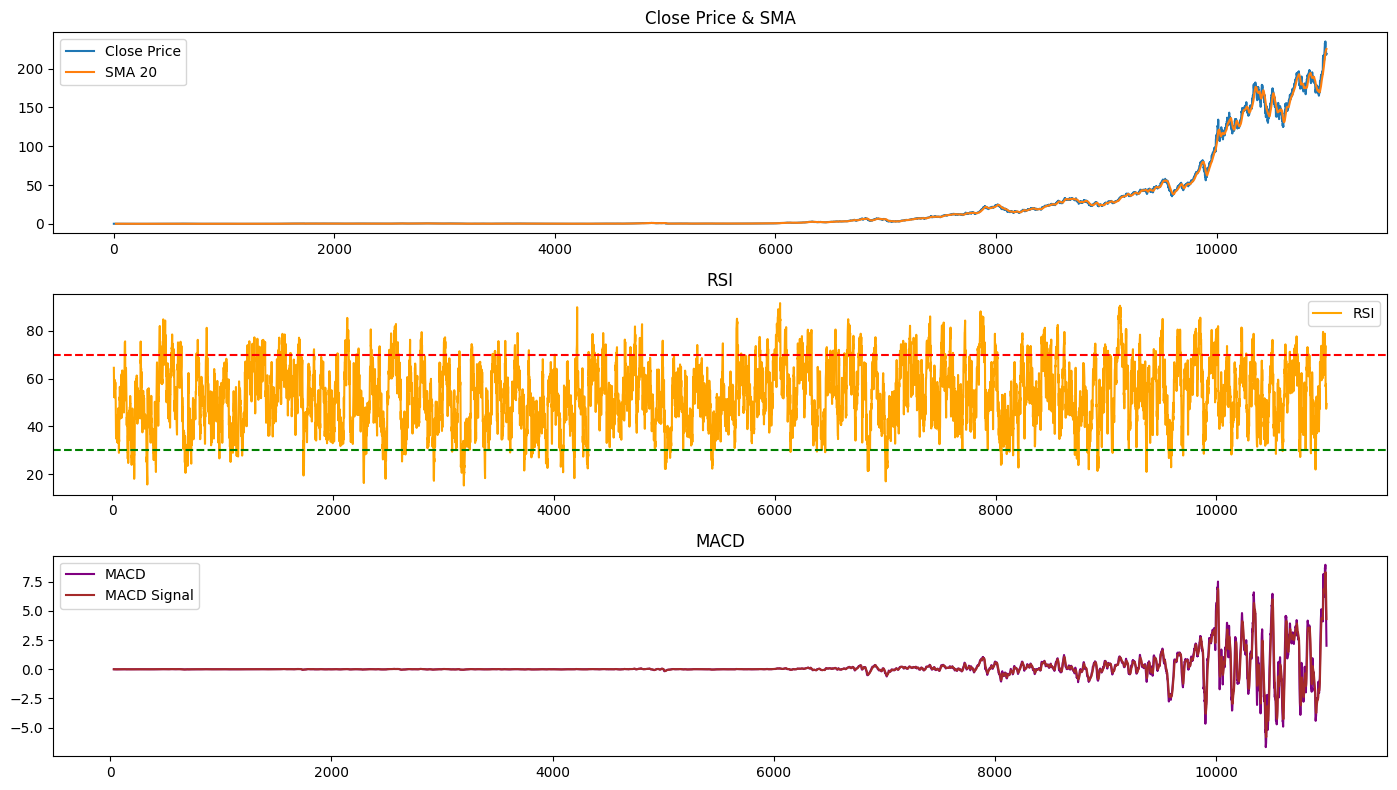

Report: {'missing_values': {'Date': 0, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Adj Close': 0, 'Volume': 0, 'Dividends': 0, 'Stock Splits': 0, 'SMA_20': 19, 'RSI': 14, 'MACD': 33, 'MACD_signal': 33}, 'summary_statistics': {'Open': {'count': 10998.0, 'mean': 22.299160011953404, 'std': 46.003684660364485, 'min': 0.0496650002896785, '25%': 0.2991069853305816, '50%': 0.53125, '75%': 20.204195976257324, 'max': 236.47999572753903}, 'High': {'count': 10998.0, 'mean': 22.539055202034024, 'std': 46.49603055785277, 'min': 0.0496650002896785, '25%': 0.3037104904651642, '50%': 0.5379459857940674, '75%': 20.389554023742676, 'max': 237.22999572753903}, 'Low': {'count': 10998.0, 'mean': 22.068367156640623, 'std': 45.54092858157874, 'min': 0.0491070002317428, '25%': 0.2901790142059326, '50%': 0.5223209857940674, '75%': 19.99803638458252, 'max': 233.08999633789065}, 'Close': {'count': 10998.0, 'mean': 22.312754411817718, 'std': 46.037660077626796, 'min': 0.0491070002317428, '25%': 0.298548996448516

In [58]:
import os
import pandas as pd
import pynance as pn
import talib
import numpy as np
import matplotlib.pyplot as plt

class StockDataAnalyzer:
    def __init__(self, data_folder):
        self.data_folder = data_folder
        self.dataframes = self._load_all_data()
    
    def _load_all_data(self):
        dfs = {}
        if not os.path.exists(self.data_folder):
            os.makedirs(self.data_folder)
        for file in os.listdir(self.data_folder):
            if file.endswith('.csv'):
                path = os.path.join(self.data_folder, file)
                df = pd.read_csv(path)
                dfs[file] = df
        return dfs

    def head(self, filename, n=5):
        return self.dataframes[filename].head(n)

    def info(self, filename):
        return self.dataframes[filename].info()

    def check_missing(self, filename):
        return self.dataframes[filename].isnull().sum()

    def summary_statistics(self, filename):
        return self.dataframes[filename].describe()

    def shape(self, filename):
        return self.dataframes[filename].shape

    def check_uniqueness(self, filename):
        return self.dataframes[filename].nunique()

    def prepare_data(self, filename):
        df = self.dataframes[filename]
        required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        for col in required_cols:
            if col not in df.columns:
                raise ValueError(f"Missing column: {col}")
        df = df.dropna(subset=required_cols)
        self.dataframes[filename] = df
        return df

    def add_talib_indicators(self, filename):
        df = self.dataframes[filename]
        df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
        df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
        macd, macdsignal, macdhist = talib.MACD(df['Close'])
        df['MACD'] = macd
        df['MACD_signal'] = macdsignal
        self.dataframes[filename] = df
        return df

    def visualize(self, filename):
        df = self.dataframes[filename]
        plt.figure(figsize=(14, 8))
        plt.subplot(3, 1, 1)
        plt.plot(df['Close'], label='Close Price')
        plt.plot(df['SMA_20'], label='SMA 20')
        plt.title('Close Price & SMA')
        plt.legend()
        plt.subplot(3, 1, 2)
        plt.plot(df['RSI'], label='RSI', color='orange')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title('RSI')
        plt.legend()
        plt.subplot(3, 1, 3)
        plt.plot(df['MACD'], label='MACD', color='purple')
        plt.plot(df['MACD_signal'], label='MACD Signal', color='brown')
        plt.title('MACD')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def report(self, filename):
        df = self.dataframes[filename]
        report = {
            "missing_values": df.isnull().sum().to_dict(),
            "summary_statistics": df.describe().to_dict(),
            "shape": df.shape,
            "unique_counts": df.nunique().to_dict(),
            "recommendations": [
                "Consider using SMA and RSI for trend and momentum analysis.",
                "Monitor MACD crossovers for potential buy/sell signals.",
                "Handle missing values and outliers before modeling.",
                "Visualize indicators regularly to spot market changes."
            ]
        }
        return report

# Usage with the correct dataset path
data_folder = '../data/yfinance_data'
analyzer = StockDataAnalyzer(data_folder=data_folder)
loaded_files = list(analyzer.dataframes.keys())
print("Loaded files:", loaded_files)

if loaded_files:
    filename = loaded_files[0]
    print("Selected filename:", filename)
    print(analyzer.head(filename))
    analyzer.info(filename)
    print("Missing values:\n", analyzer.check_missing(filename))
    print(analyzer.summary_statistics(filename))
    print("Shape:", analyzer.shape(filename))
    print("Unique counts:\n", analyzer.check_uniqueness(filename))
    analyzer.prepare_data(filename)
    analyzer.add_talib_indicators(filename)
    analyzer.visualize(filename)
    report = analyzer.report(filename)
    print("Report:", report)
else:
    print("No CSV files found in '../data/yfinance_data'. Please add data files.")

In [15]:
# Load the stock price data for the selected filename into a pandas DataFrame
df = analyzer.dataframes[filename]

# Display the first few rows to ensure required columns are present
print(df.head())

# Check if required columns exist
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  
0        0.0           0.0     NaN  NaN   NaN          NaN  
1        0.0           0.0     NaN  NaN   NaN          NaN  
2        0.0           0.0     NaN  NaN   NaN          NaN  
3        0.0           0.0     NaN  NaN   NaN          NaN  
4        0.0           0.0     NaN  NaN   NaN          NaN  
All required columns are present.


In [16]:
# Calculate and add technical indicators using TA-Lib
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
macd, macd_signal, macd_hist = talib.MACD(df['Close'])
df['MACD'] = macd
df['MACD_signal'] = macd_signal
df['MACD_hist'] = macd_hist

# Display the last few rows to verify the indicators
print(df[['Close', 'SMA_50', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].tail())

            Close      SMA_50      EMA_20     RSI_14      MACD  MACD_signal  \
10993  218.539993  208.474199  222.376929  48.687742  4.662717     6.678882   
10994  217.490005  209.098399  221.911508  47.386437  3.748082     6.092722   
10995  217.960007  209.709000  221.535174  48.055700  3.026267     5.479431   
10996  218.240005  210.279400  221.221349  48.476184  2.448591     4.873263   
10997  218.800003  210.858600  220.990744  49.359115  2.012764     4.301163   

       MACD_hist  
10993  -2.016164  
10994  -2.344640  
10995  -2.453164  
10996  -2.424672  
10997  -2.288399  


In [19]:
# Extract and concatenate all datasets from the data_folder for analysis
dfs = []
for file in loaded_files:
    df_temp = analyzer.dataframes[file].copy()
    ticker = file.split('_')[0]
    df_temp['Ticker'] = ticker
    dfs.append(df_temp)

combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())
print("Combined shape:", combined_df.shape)
print("Tickers in combined_df:", combined_df['Ticker'].unique())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  SMA_50  EMA_20  \
0        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
1        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
2        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
3        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
4        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   

   RSI_14  MACD_hist Ticker  
0     NaN        NaN   AAP

In [20]:
# Load the stock price data for a specific ticker (e.g., TSLA) into a pandas DataFrame
# The variable 'temp_df' already contains the TSLA stock price data

print(temp_df.head())

# Ensure required columns are present
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in temp_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present in temp_df.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits Ticker  
0        0.0           0.0   TSLA  
1        0.0           0.0   TSLA  
2        0.0           0.0   TSLA  
3        0.0           0.0   TSLA  
4        0.0           0.0   TSLA  
All required columns are present in temp_df.


In [21]:
# Load stock price data for selected tickers into a pandas DataFrame
# The variable 'combined_df' already contains all the required data for AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

# Display the first few rows and check required columns
print(combined_df.head())

required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in combined_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present in combined_df.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  SMA_50  EMA_20  \
0        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
1        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
2        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
3        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
4        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   

   RSI_14  MACD_hist Ticker  
0     NaN        NaN   AAP

In [22]:
# The variable 'combined_df' already contains all the required stock price data for AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA
# and includes columns: Open, High, Low, Close, and Volume.

# Group the data by the 'Ticker' column (which represents the stock name)
grouped = combined_df.groupby('Ticker')

# Display the first entry for each group to verify
for name, group in grouped:
    print(f"Ticker: {name}")
    print(group[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].head(1))

Ticker: AAPL
         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
Ticker: AMZN
             Date      Open   High       Low     Close      Volume
10998  1997-05-15  0.121875  0.125  0.096354  0.097917  1443120000
Ticker: GOOG
             Date      Open      High       Low     Close     Volume
17844  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
Ticker: META
             Date  Open       High        Low  Close    Volume
22864  2012-12-12  28.0  28.139999  27.370001  27.58  46704200
Ticker: MSFT
             Date      Open      High       Low     Close      Volume
25790  1986-03-13  0.088542  0.101563  0.088542  0.097222  1031788800
Ticker: NVDA
             Date     Open      High       Low     Close      Volume
35462  1999-01-22  0.04375  0.048828  0.038802  0.041016  2714688000
Ticker: TSLA
             Date      Open      High       Low     Close     Volume
41883  2010-06-29  1.266667  1.666

In [ ]:
import pynance as pn

# Apply TA-Lib technical indicators to combined_df for each ticker
for ticker in combined_df['Ticker'].unique():
    mask = combined_df['Ticker'] == ticker
    combined_df.loc[mask, 'SMA_20'] = talib.SMA(combined_df.loc[mask, 'Close'], timeperiod=20)
    combined_df.loc[mask, 'RSI_14'] = talib.RSI(combined_df.loc[mask, 'Close'], timeperiod=14)
    macd, macd_signal, macd_hist = talib.MACD(combined_df.loc[mask, 'Close'])
    combined_df.loc[mask, 'MACD'] = macd
    combined_df.loc[mask, 'MACD_signal'] = macd_signal
    combined_df.loc[mask, 'MACD_hist'] = macd_hist

# Example: Use PyNance for financial metrics (e.g., annualized volatility)

# Calculate annualized volatility for each ticker
volatility = {}
for ticker in combined_df['Ticker'].unique():
    close_prices = combined_df.loc[combined_df['Ticker'] == ticker, 'Close']
    returns = close_prices.pct_change().dropna()
    volatility[ticker] = pn.metrics.annualized_volatility(returns)

print("Annualized Volatility by Ticker:", volatility)

# Visualize Close price and indicators for a selected ticker (e.g., AAPL)
selected_ticker = 'AAPL'
df_plot = combined_df[combined_df['Ticker'] == selected_ticker]

plt.figure(figsize=(14, 8))
plt.plot(df_plot['Date'], df_plot['Close'], label='Close Price')
plt.plot(df_plot['Date'], df_plot['SMA_20'], label='SMA 20')
plt.title(f'{selected_ticker} Close Price & SMA 20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df_plot['Date'], df_plot['RSI_14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f'{selected_ticker} RSI 14')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df_plot['Date'], df_plot['MACD'], label='MACD', color='purple')
plt.plot(df_plot['Date'], df_plot['MACD_signal'], label='MACD Signal', color='brown')
plt.bar(df_plot['Date'], df_plot['MACD_hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title(f'{selected_ticker} MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      ERROR: Could not find a version that satisfies the requirement setuptools (from versions: none)
      ERROR: No matching distribution found for setuptools
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [29]:
%pip install TA-Lib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
